In [43]:
import pandas as pd
import numpy as np
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore")

In [44]:
# LOAD DATA
train_df= pd.read_csv('../data/rossmann-store-sales/train.csv')
test_df = pd.read_csv('../data/rossmann-store-sales/test.csv')
store_df = pd.read_csv('../data/rossmann-store-sales/store.csv')

In [45]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [46]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [47]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [48]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


# Data Cleaning

In [49]:
import os
import sys

In [50]:
# importing scripts
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from cleaner import DfCleaner
from df_overview import DfOverview
from train_model import TrainModel
from df_outlier import DfOutlier
from vis_seaborn import VisSeaborn
from file_handler import FileHandler


cleaner = DfCleaner()




In [51]:
#null values in our data frame fro each column
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [52]:
#Handle CompetitionDistance missing values
store_df = cleaner.fill_with_median(store_df,['CompetitionDistance'])

In [53]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Let's look into what data of CompetitionOpenSinceMonth and CompetitionOpenSinceYear.

In [54]:

np.sort(store_df['CompetitionOpenSinceMonth'].unique())


array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., nan])

In [55]:
np.sort(store_df['CompetitionOpenSinceYear'].unique())

array([1900., 1961., 1990., 1994., 1995., 1998., 1999., 2000., 2001.,
       2002., 2003., 2004., 2005., 2006., 2007., 2008., 2009., 2010.,
       2011., 2012., 2013., 2014., 2015.,   nan])

Columns CompetitionOpenSinceMonth and CompetitionOpenSinceYear hold the year and month when a new competition opened. Since there is CompetitionDistance for all columns the time when new competition is started. Here both CompetitionOpenSinceMonth and CompetitionOpenSinceYear having null value is meaning full. It means competition for a store has already been there before the store is established or there is no competition.

The longest time we have in the dataset is 1900. So I have replaced the None values with the first month 1990.

In [56]:
# Let us fix CompetitionOpenSinceMonth and CompetitionOpenSinceYear columns
store_df['CompetitionOpenSinceMonth'] = store_df['CompetitionOpenSinceMonth'].fillna(1)
store_df['CompetitionOpenSinceYear'] = store_df['CompetitionOpenSinceYear'].fillna(1990)


In [57]:
store_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Now we are left with three columns. Promo2SinceWeek, Promo2SinceYear, and PromoInterval. All of these columns have a null percentage of 48.79 %. Let's look into what data they are holding.

In [58]:
np.sort(store_df['Promo2SinceWeek'].unique())


array([ 1.,  5.,  6.,  9., 10., 13., 14., 18., 22., 23., 26., 27., 28.,
       31., 35., 36., 37., 39., 40., 44., 45., 48., 49., 50., nan])

In [59]:
np.sort(store_df['Promo2SinceYear'].unique())


array([2009., 2010., 2011., 2012., 2013., 2014., 2015.,   nan])

In [60]:
store_df['PromoInterval'].unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [61]:
store_df[store_df['Promo2'] == 0][['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']].tail(5)

,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1107,NaN,NaN,NaN
1109,NaN,NaN,NaN
1111,NaN,NaN,NaN
1112,NaN,NaN,NaN
1113,NaN,NaN,NaN


As we can see, these three columns are dependent on Promo2, and the reason for messing the value is because Promo2 is equal to 0. The problem is we can not store this information in a month or a year. So we will create a new column holding if the store participated in promo2. then we can replace Promo2SinceYear and Promo2SinceWeek with the earliest month and week.

In [62]:
store_df['Promo2SinceWeek'] = store_df['Promo2SinceWeek'].fillna(0)
store_df['Promo2SinceYear'] = store_df['CompetitionOpenSinceYear'].fillna(0)

In [63]:
store_df[store_df['Promo2'] == 0][['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']].tail(5)

,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1107,0.0,2004.0,NaN
1109,0.0,2010.0,NaN
1111,0.0,2006.0,NaN
1112,0.0,1990.0,NaN
1113,0.0,1990.0,NaN


Entries in PromotionInterval have 4 entries. We will split those points into 4 columns


In [64]:
month_abbr = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
def getMonth(months, index):
  if(months == 0):
    return 0

  month = months.split(',')[index]
  return month_abbr.index(month)+1

In [65]:
store_df['PromoInterval'] = store_df['PromoInterval'].fillna(0)
store_df['PromoInterval0'] = store_df.PromoInterval.apply((lambda x: getMonth(x, 0)))
store_df['PromoInterval1'] = store_df.PromoInterval.apply((lambda x: getMonth(x, 1)))
store_df['PromoInterval2'] = store_df.PromoInterval.apply((lambda x: getMonth(x, 2)))
store_df['PromoInterval3'] = store_df.PromoInterval.apply((lambda x: getMonth(x, 3)))
store_df = cleaner.drop_columns(store_df, ['PromoInterval'])

In [66]:
store_overview = DfOverview(store_df)
store_overview.missing_value()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Fixing Outliers

In [67]:
df_outliers = DfOutlier(store_df[['CompetitionDistance']].copy())
overview = df_outliers.getOverview()
overview

,number_of_outliers,percentage_of_outliers,skew,Q1,Median,Q3
label,,,,,,
CompetitionDistance,108,9.69%,2.934389,720.0,2325.0,6875.0


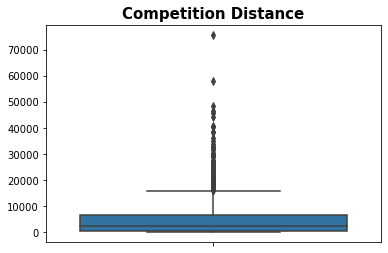

In [68]:
sb = VisSeaborn()
sb.boxplot(store_df, ['CompetitionDistance'], 'Competition Distance', figsize=(6, 4))

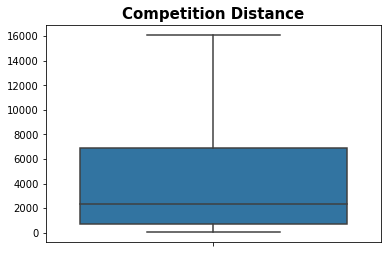

In [69]:
df_outliers = DfOutlier(store_df)
df_outliers.replace_outliers_with_iqr(['CompetitionDistance'])
df_store = df_outliers.df
sb.boxplot(df_store, ['CompetitionDistance'], 'Competition Distance', figsize=(6, 4))

In [70]:
#Fix outliers of train data
df_outliers = DfOutlier(train_df[['Sales', 'Customers']].copy())
overview = df_outliers.getOverview()
overview

,number_of_outliers,percentage_of_outliers,skew,Q1,Median,Q3
label,,,,,,
Sales,26694,2.62%,0.64146,3727.0,5744.0,7856.0
Customers,38095,3.75%,1.59865,405.0,609.0,837.0


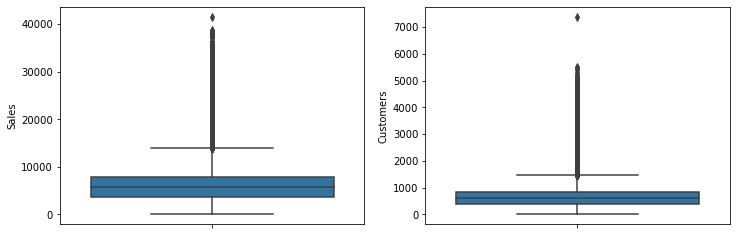

In [71]:
sb.boxplot(train_df, ['Sales', 'Customers'], cols=2, figsize=(12, 4))


In [72]:
df_outliers = DfOutlier(train_df)
df_outliers.replace_outliers_with_iqr(['Sales', 'Customers'])
train_df = df_outliers.df

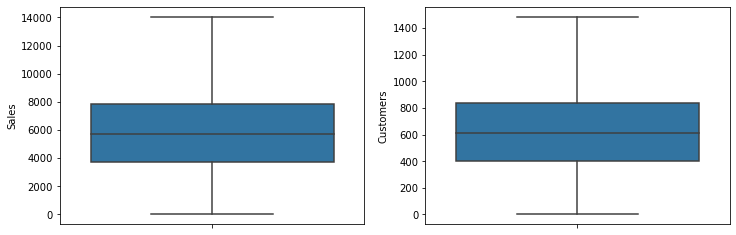

In [73]:
sb.boxplot(train_df, ['Sales', 'Customers'], cols=2, figsize=(12, 4))

In [74]:
#convert date to date time
train_df = cleaner.convert_to_datetime(train_df, ['Date'])
test_df = cleaner.convert_to_datetime(test_df, ['Date'])

In [75]:
file_handler = FileHandler
file_handler.save_csv(store_df, '../data/store.csv')
file_handler.save_csv(train_df, '../data/train.csv')
file_handler.save_csv(test_df, '../data/test.csv')

TypeError: save_csv() missing 1 required positional argument: 'csv_path'